In [1]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import plot_tree
import seaborn as sns

In [2]:
# Importing the BankNote_Authenticator dataset using pandas
df = pd.read_csv('BankNote_Authentication.csv')

In [3]:
# Separating the features (X)
# Separating the target variable (Y)

X = df.drop('class', axis=1)
Y = df.iloc[:, -1]                           

In [4]:
# Splitting the dataset into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=60)

In [5]:
# Instantiating a DecisionTreeClassifier with criterion='entropy'
tree = DecisionTreeClassifier(criterion='entropy') 

In [6]:
train = pd.concat([X_train, Y_train], axis=1)           # Combining the features & target into a training data
test = pd.concat([X_test, Y_test], axis=1)              # Combining features & target into test data
print(train)                                            # Visualizing train data

      variance  skewness  curtosis  entropy  class
404    0.37980   0.70980  0.757200  -0.4444      0
1067  -0.82601   2.96110 -1.286400  -1.4647      1
557    4.04050   0.51524  1.027900   1.1060      0
1164  -6.33640   9.28480  0.014275  -6.7844      1
1296  -3.59330   0.22968  0.712600  -0.3332      1
...        ...       ...       ...      ...    ...
72     4.71810  10.01530 -3.948600  -3.8582      0
99    -2.74190  11.40380  2.539400  -5.5793      0
399    2.96950   5.62220  0.275610  -1.1556      0
1089  -2.98210   4.19860 -0.589800  -3.9642      1
205    4.80770   2.23270 -0.263340   1.5534      0

[919 rows x 5 columns]


In [7]:
tree.fit(X_train, Y_train)                              # Fitting the decision tree model on the training dataset
Y_pred = tree.predict(X_test)                           # Predicting the target variable for the test dataset

In [8]:
cm = confusion_matrix(Y_test, Y_pred)                   # Computing the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Yes', 'Actual No'], columns=['Predicted Yes', 'Predicted No'])  # Converting confusion matrix into dataframe 

[[249   2]
 [  0 202]]


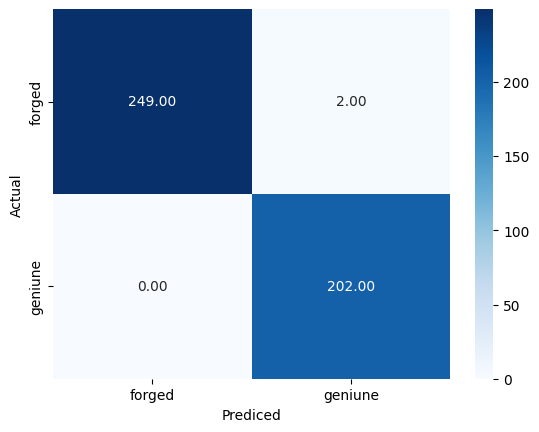

In [9]:
# Generate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
sns.heatmap(cm, cmap="Blues", annot=True, fmt='.2f',
xticklabels=['forged', 'geniune'], yticklabels=['forged', 'geniune'])
plt.xlabel("Prediced")
plt.ylabel("Actual")
plt.show()

In [10]:
report = classification_report(Y_test, Y_pred)          # Computing the classification report
print(report)                                           # Viewing classification report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       251
           1       0.99      1.00      1.00       202

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



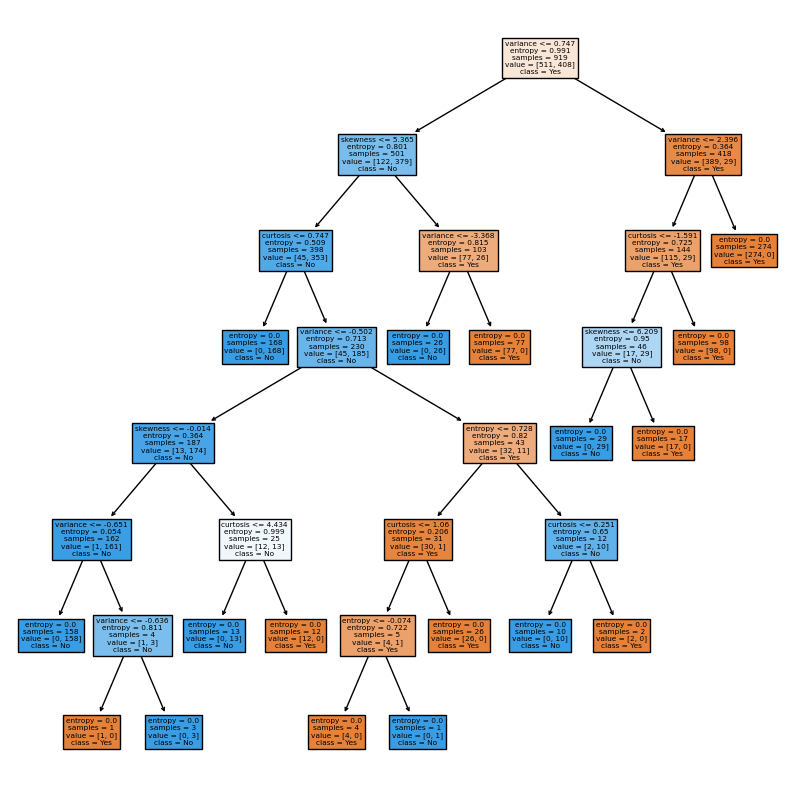

In [11]:
# Visualizing the decision tree in plot
plt.figure(figsize=(10, 10))
plot_tree(tree, feature_names=X.columns, class_names=['Yes', 'No'], filled=True)
plt.show()